# New York City Car Accidents

In this project, we'll review, clean and analyse data on motor vehicle collisions released by New York City and published on the NYC OpenData website.  

This data is a random sample of crashed from the year 2018.

The analysis will aim to determine:
* The period of day where most car accidents occur; and
* The locations in NYC where most car accidents occur.

# Import Data and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
mvc = pd.read_csv("nypd_mvc_2018.csv")

A summary of the columns and their data is below:

unique_key: A unique identifier for each collision.

date, time: Date and time of the collision.

borough: The borough, or area of New York City, where the collision occurred.

location: Latitude and longitude coordinates for the collision.

on_street, cross_street, off_street: Details of the street or intersection where the collision occurred.

pedestrians_injured: Number of pedestrians who were injured.

cyclist_injured: Number of people traveling on a bicycle who were injured.

motorist_injured: Number of people traveling in a vehicle who were injured.

total_injured: Total number of people injured.

pedestrians_killed: Number of pedestrians who were killed.

cyclist_killed: Number of people traveling on a bicycle who were killed.

motorist_killed: Number of people traveling in a vehicle who were killed.

total_killed: Total number of people killed.

vehicle_1 through vehicle_5: Type of each vehicle involved in the accident.

cause_vehicle_1 through cause_vehicle_5: Contributing factor for each vehicle in the accident.

In [2]:
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


# Finding Null Values

In [3]:
# Find number of null values for each column

null_counts = mvc.isnull().sum()

null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [4]:
# calculate percent null values for each column
null_counts_pct = null_counts / mvc.shape[0] * 100

# create DataFrame of results
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})

# Rotate so rows become columns and vice-versa
null_df = null_df.T.astype(int)

null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


About a third of the columns have no null values, with the rest ranging from less than 1% to 99%.

We'll start by reviewing the group of columns that relate to people killed in collisions.

In [5]:
# obtain list of columns with the string 'killed' in them
killed_cols = [col for col in mvc.columns if 'killed' in col]

# pass list to null_df
null_df[killed_cols]



,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


# Fill in Missing Data

We can see that we have 5 null values for total_killed, but none for the three individual cols
we should be able to fill in the total_killed values because they'll be the sum of the 
other three columns per row. This is known as IMPUTATION.

Each of the individual categories have no missing values, but the total_killed column has five missing values.

In [6]:
killed = mvc[killed_cols].copy()

# determine sum of first 3 columns of killed
killed_manual_sum = killed[killed_cols[:3]].sum(axis=1)

# return df of rows where sum of first 3 cols aren't equal to total_killed
killed_non_eq = killed[killed['total_killed'] != killed_manual_sum]

killed_non_eq



,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


There are five rows where the total_killed is not equal to the sum of the individual columns because the data is missing.

There is one row where the total_killed is less than the sum of the individual columns

In [7]:
# clean total_killed column using Series.mask()

killed_null = killed['total_killed'].isnull()

# replace NaN values in total_killed with the sum of the other killed columns
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

In [8]:
# next for the row which has 1 for motorist_killed but 0 for total_killed, we'll replace
# the total_killed value with NaN

killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

In [9]:
# We have a similar issue with total_injured which we'll address in a similar fashion

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

In [10]:
# dataframe where sum of injured values in row does not equal total_injured
injured_non_eq = injured[injured['total_injured'] != injured_manual_sum]

injured_non_eq

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0
12885,1,0,0,0.0
13344,0,0,0,1.0
15213,0,0,0,2.0
20163,0,0,0,1.0
20978,0,0,0,1.0


In [11]:
injured_null = injured['total_injured'].isnull()

# replace NaN values in total_killed with the sum of the other killed columns
injured['total_injured'] = injured['total_injured'].mask(injured_null, injured_manual_sum)

In [12]:
injured_non_eq = injured[injured['total_injured'] != injured_manual_sum]

injured_non_eq

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0
12885,1,0,0,0.0
13344,0,0,0,1.0
15213,0,0,0,2.0
20163,0,0,0,1.0
20978,0,0,0,1.0


In [13]:
# next for the rows where the sum of the three injured rows is greater than total_injured,
# we'll replace the total_injured values with NaN

injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

In [14]:
# Summary of the count of null values before and after the changes

summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
pd.DataFrame(summary, index=['before','after'])



,injured,killed
before,1,5
after,21,1


For the total_killed column, the number of missing values has decreased from 5 to 1. For the total_injured column, the number of values has increased from 1 to 21.  Although this is an increase, we have achieved our goal of filling all the null values and identifying values that have suspect data.

In [15]:
# Assign the updated total_injured column in the injured df to the mvc df
mvc['total_injured'] = injured['total_injured']

# Assign the updated total_killed column in the killed df to the mvc df
mvc['total_killed'] = killed['total_killed']

# Visualising Missing Data with Heatmaps

Initially we used a table of numbers to understand the number of missing values in our df.
A different approach is to use a plot to visualise the missing values using a heatmap


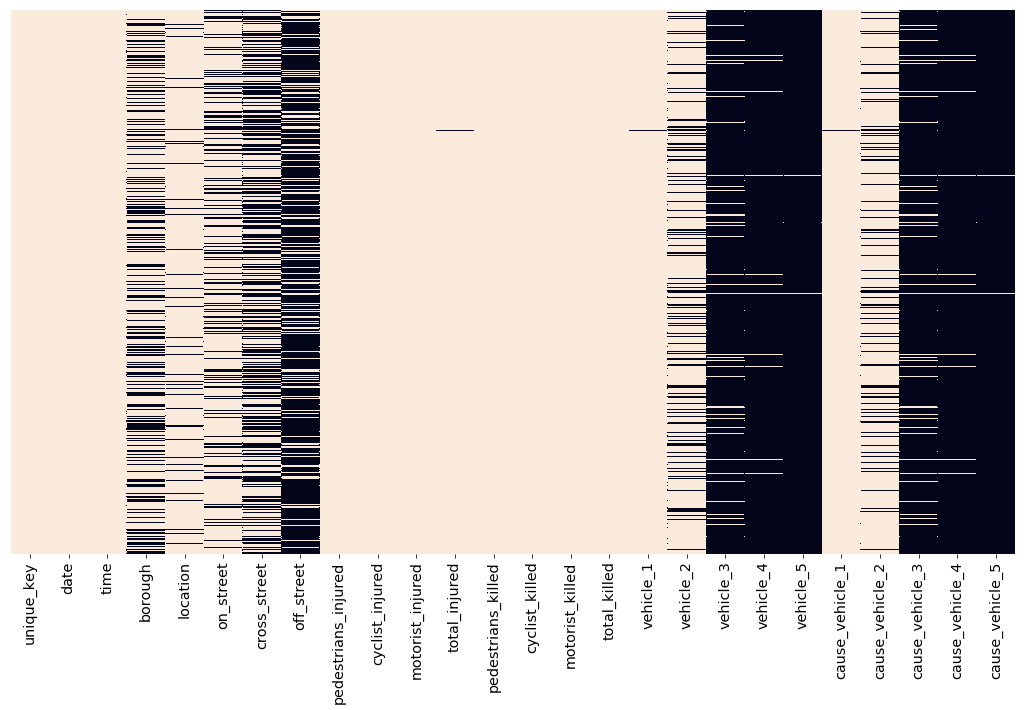

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()
    
plot_null_matrix(mvc, figsize=(18,10))

We can make some immediate interpretations about our dataframe:

The first three columns have few to no missing values.
The next five columns have missing values scattered throughout, with each column seeming to have its own density of missing values.
The next eight columns are the injury and killed columns we just cleaned, and only have a few missing values.
The last 10 columns seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.

We'll examine the pattern in the last 10 columns a little more closely.  We'll start by constructing a correlation heat map of the last 10 columns to see if we can more closely identify the pattern in the matrix plot

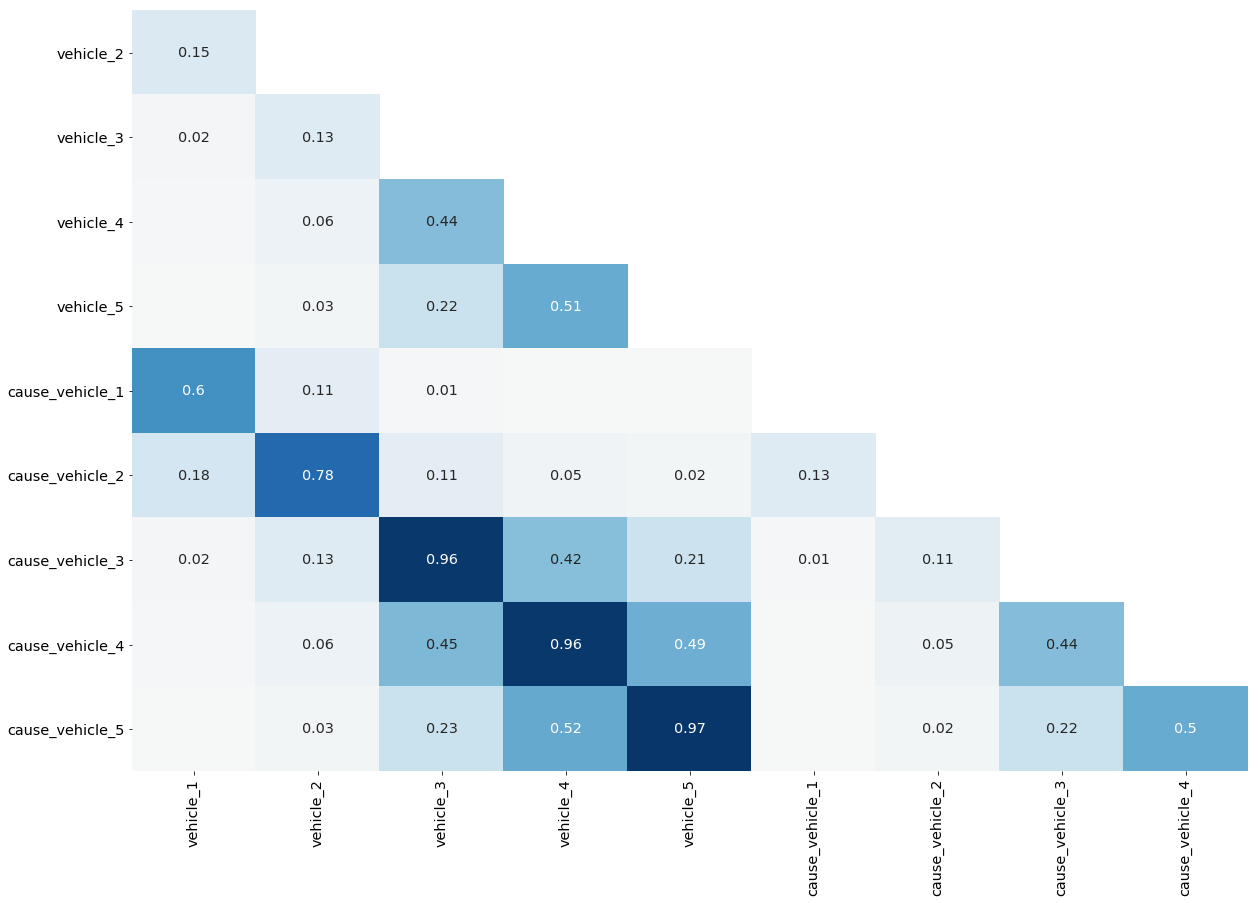

In [17]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

# create list of columns which contain 'vehicle'
vehicle_cols = [col for col in mvc.columns if 'vehicle' in col]

plot_null_correlations(mvc[vehicle_cols])

If we look at the diagonal values moving right and downwards from the intersection of vehicle_1 and cause_vehicle_1 we note that these have a higher correlation than the rest. This makes sense though, because when a vehicle is in an accident, there is likely to be a cause, and vice versa.

Let's explore the variations in missing values from these five pairs of columns.  We'll create a df that counts for each pair: 
* The number of values where the vehicle is missing when the cause is not missing.
* The number of values where the cause is missing when the vehicle is not missing.

In [18]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []


for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v, v_null, c_null])
    
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)

vc_null_df
    

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


The df above indicates there are roughly 4,500 missing values across 10 columns. We could drop them all, but then we would lose almost 8% of our data.

Instead we'll attempt to impute our data by using the most common value to fill in data.

# Imputing Collision Data

In [19]:
# create a list of the columns containing the string 'cause'
cause_cols = [c for c in mvc.columns if "cause_" in c]

# filter the mvc df by cause_cols
cause = mvc[cause_cols]

# stack the values into a single series object
cause_1d = cause.stack()

cause_1d

# count the values in the series
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
top10_causes



Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

The most common non-null value for the cause columns is Unspecified,  which presumably 
indicates that the officer reporting the collision was unable to determine the 
cause for that vehicle.

In [20]:
# we'll do the same for the vehicle columns

# create a list of columns which start with 'vehicle'
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]

# filter the results by v_cols
vehicles = mvc[v_cols]

vehicles_1d = vehicles.stack()

vehicle_counts = vehicles_1d.value_counts()

top10_vehicles = vehicle_counts.head(10)

top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [21]:
# For values where the vehicle is null and the cause is non-null, set the vehicle to Unspecified.
# For values where the cause is null and the vehicle is not-null, set the cause to Unspecified.

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()

    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")


In [22]:
# Check that the null_values have been replaced

col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []


for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v, v_null, c_null])
    
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)

vc_null_df
    

,v_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


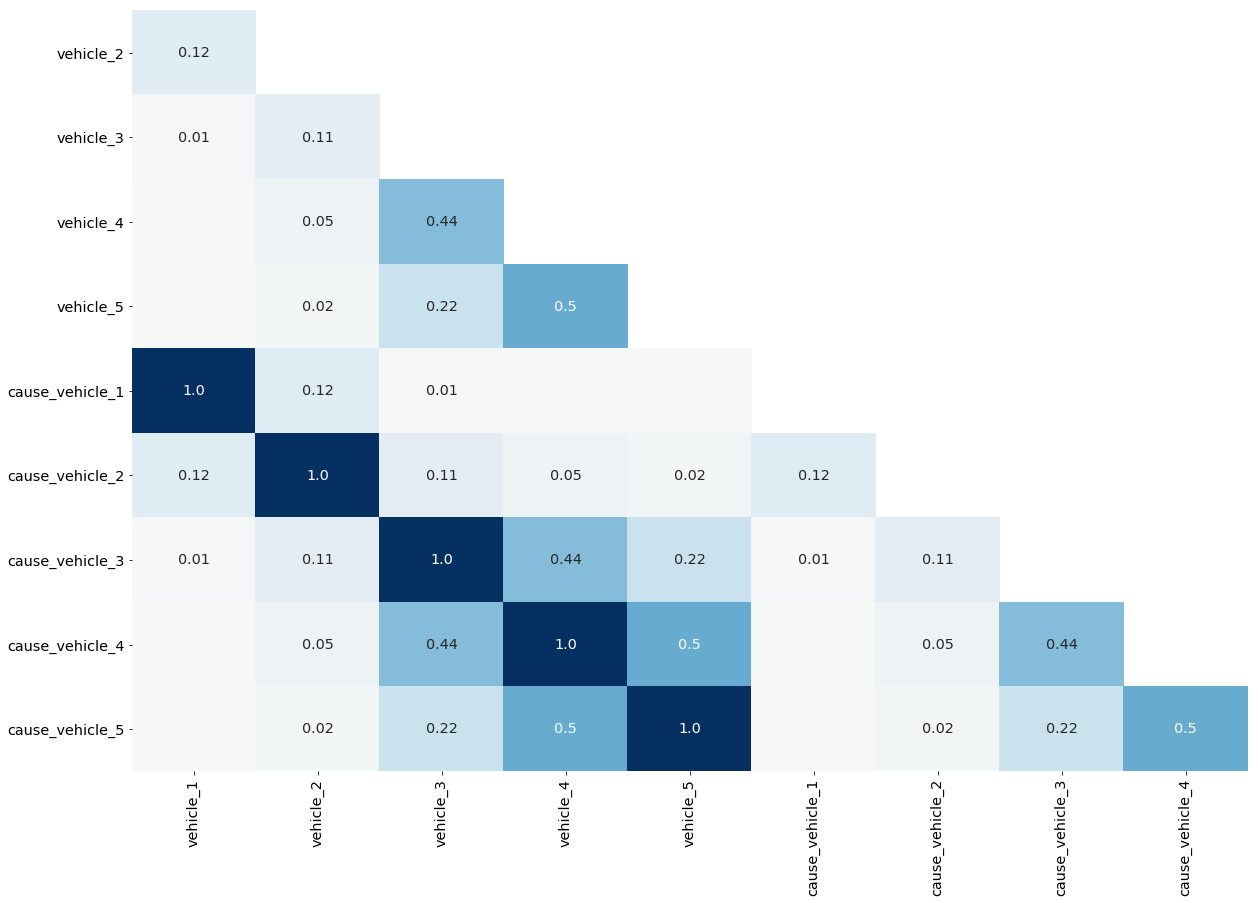

In [23]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

We can see that we now have a perfect correlation between each pair of vehicle-cause columns represented by a 1.0 in each square. 

Let's now look at the final set of columns that contain missing values - the columns that relate to the location of the accident.  

# Imputing Location Data

In [24]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [25]:
# sum of missing data by column

location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

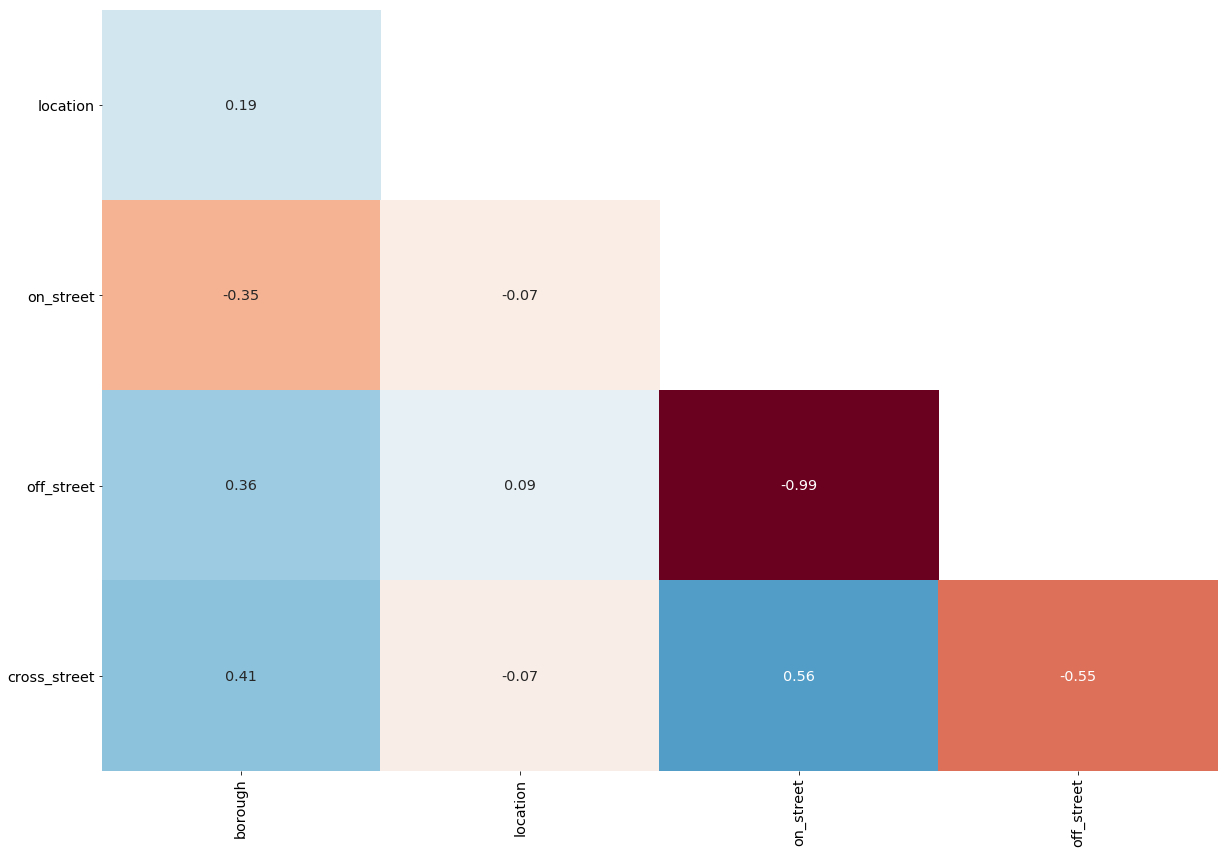

In [26]:
plot_null_correlations(location_data)

None of these columns have strong correlations except for off_street and on_street which have a near perfect negative correlation. That means for almost every row that has a null value in one column, the other has a non-null value and vice-versa.



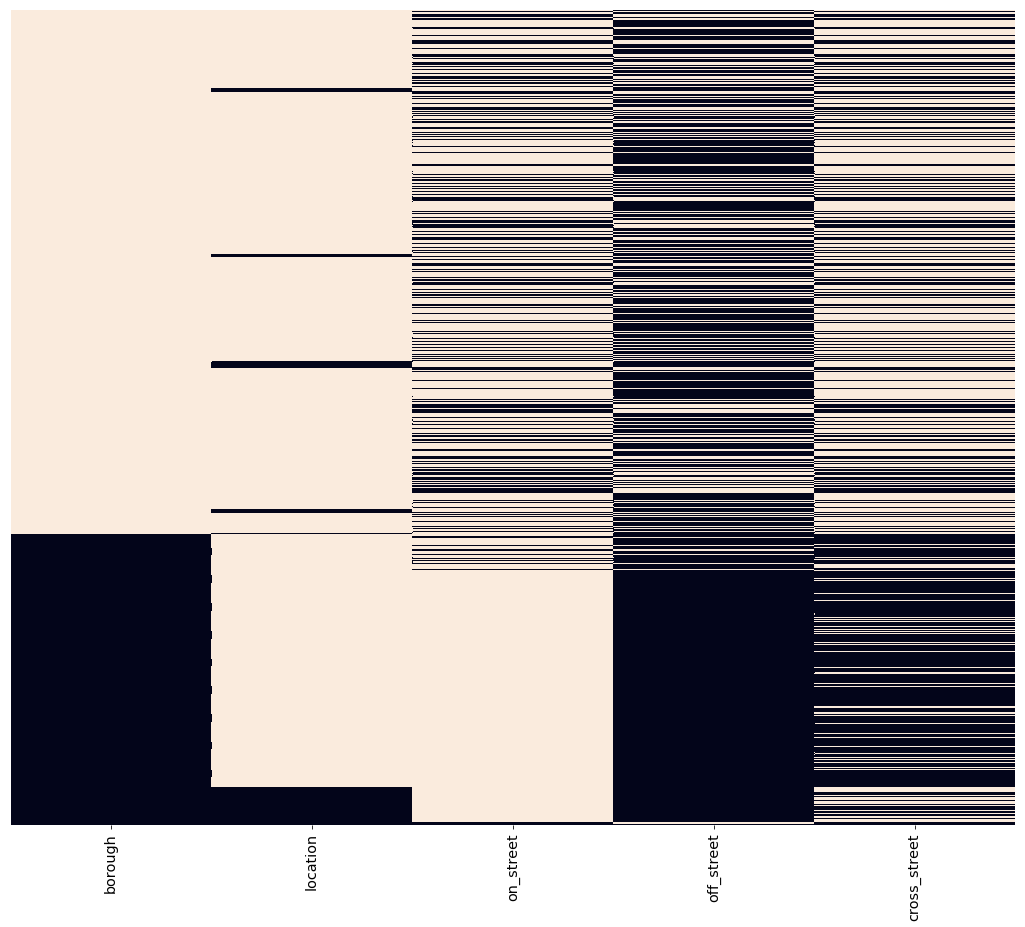

In [27]:
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

Let's make some observations about the missing values across these columns:

About two-thirds of rows have non-null values for borough, but of those values that are missing, most have non-null values for location and one or more of the street name columns.
Less than one-tenth of rows have missing values in the location column, but most of these have non-null values in one or more of the street name columns.
Most rows have a non-null value for either on_street or off_street, and some also have a value for cross_street.

Next we'll import some supplementary data which uses the GeoPy package as follows:

For rows with location values but missing values in either borough or the street name columns, geocoding APIs were used to look up the location coordinates to find the missing data.


For rows with values in the street name columns missing borough and/or location data, geocoding APIs were used to look up the address to find the missing data.



In [28]:
#import supplementary data. 
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


In [29]:
# confirm that unique_key in sup_data is equal to mvc data
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
is_equal

True

In [30]:
# count number of null values per column
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [31]:
# use Series.mask() to replace null values in mvc with sup_data
for col in location_cols:
        mvc[col] = mvc[col].mask(mvc[col].isnull(), sup_data[col])

In [32]:
null_after = mvc[location_cols].isnull().sum()
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64

# Merge Duplicates / Near-Duplicates for Vehicle Data

In [33]:
vehicle_dict = {'PASSENGER VEHICLE': 'Sedan', 'SPORT UTILITY / STATION WAGON': 'Station Wagon/Sport Utility Vehicle',
               'TAXI':'taxi', 'taxi': 'Taxi', 'PICK-UP TRUCK': 'Pick-up Truck', 'BICYCLE': 'Bike', 'MOTORCYCLE': 'Motorcycle'}

# merge duplicates or near-duplicates for the 5 vehicle columns
for v in range(1,6):
    mvc['vehicle_{}'.format(v)] = mvc['vehicle_{}'.format(v)].replace(vehicle_dict)

# Drop Rows with Suspect Values

In [34]:
# Find rows where total_killed has suspect data
suspect_total_killed = mvc[(mvc['total_killed'] != killed_manual_sum) & mvc['total_killed'].isnull()]

# Find rows where total_injured has suspect data
suspect_total_injured = mvc[(mvc['total_injured'] != injured_manual_sum) & mvc['total_injured'].isnull()]

# concat above two dfs and obtain index
rows_to_drop = pd.concat([suspect_total_killed, suspect_total_injured])
rows_to_drop = rows_to_drop.index

mvc.drop(rows_to_drop, inplace=True)


In [35]:
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,Sedan,Unspecified,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,BROOKLYN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


# Format Collision Time into 3 Hour Windows

In [36]:
# extract hour from time, put in new column and convert to integer
mvc['time_hr'] = mvc['time'].str.extract('(\d+)')
mvc['time_hr'] = mvc['time_hr'].astype(int)

# function which converts hour of vehicle collision into it's respective 3 hour time period
def hr_to_period(hour):
    if pd.isna(hour):
        return np.nan
    elif hour < 3:
        return "0:00-3:00"
    elif hour < 6:
        return "3:01-6:00"
    elif hour < 9:
        return "6:01-9:00"
    elif hour < 12:
        return "9:01-12:00"
    elif hour < 15:
        return "12:01-15:00"
    elif hour < 18:
        return "15:01-18:00"
    elif hour < 21:
        return "18:01-21:00"
    else:
        return "21:01-24:00"

mvc["time_period"] = mvc['time_hr'].map(hr_to_period)

mvc["time_period"].head(10)

0    21:01-24:00
1    12:01-15:00
2      0:00-3:00
3      6:01-9:00
4    15:01-18:00
5     9:01-12:00
6     9:01-12:00
7     9:01-12:00
8    21:01-24:00
9      6:01-9:00
Name: time_period, dtype: object

# Perform Initial Analysis

In [37]:
# obtain count of car accidents by time period
grouped = mvc.groupby('time_period')
grouped.size()

time_period
0:00-3:00       3575
12:01-15:00    10454
15:01-18:00    12252
18:01-21:00     8821
21:01-24:00     5251
3:01-6:00       1987
6:01-9:00       6443
9:01-12:00      9059
dtype: int64

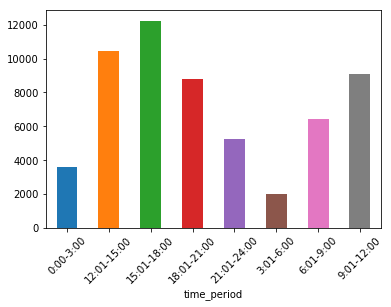

In [38]:
# bar graph of count of car accidents by time period
grouped.size().plot(kind='bar', rot=45)

plt.show()

Comment: Interestingly, it appears that the majority of car accidents occur in the latter half of the day. It would be useful to determine if fatigue levels are a factor. 

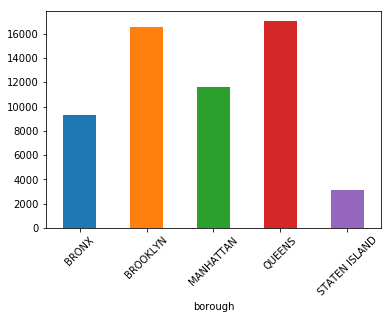

In [39]:
# bar graph of count of car accidents by suburb 

mvc.groupby('borough').size().plot(kind='bar', rot=45)

plt.show()

Comment: Traffic accidents predominantly occur in the boroughs of Brooklyn and Queens.  Without overall traffic data, we are unable to infer if overall traffic or another factor is behind the higher incidence of car accidents. 